In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
path = "/content/drive/MyDrive/customer_churn/dataset/customer_churn_large_dataset.xlsx"

df = pd.read_excel(path)

In [135]:
# Converting to Pandas DataFrame
df = pd.DataFrame(df)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [136]:
df.shape

(100000, 9)

In [137]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [138]:
df.describe(include='all')

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


**Count** for each column is 100,000 which is the total number of data points

**Location**

- Number of locations = 5

- Most common occurring location is **Houston** with 20157 data points

**Gender**

- Majority of the customers are **Female**
- Total number of females = 50216

**Age**


- Mininum age = 18

- Average age = 44

- Maximum Age = 70

**Subscription Duration**

- Minimum = 1 month

- Average = 1 year

- Maximum = 2 years

=> There are no subscriptions that are for more than 2 years



In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


## => There are no null values present in the dataset

##This can easily be confirmed using the isnull() method as well as visualized using a bar plot

In [140]:
df.isnull().any()

CustomerID                    False
Name                          False
Age                           False
Gender                        False
Location                      False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool

## => This indicates that none of the features contains any null values.

## Visualization for the same can be seen below:

<Axes: >

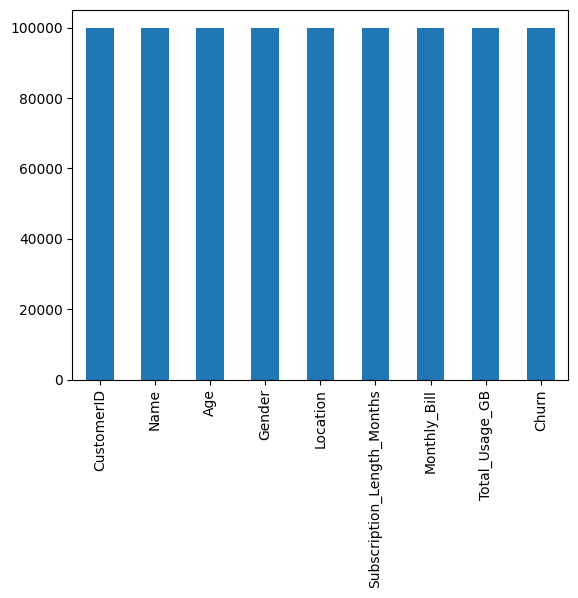

In [141]:
df.count().plot.bar()

# **Outlier Detection**
## Visualization of outliers using Distribution

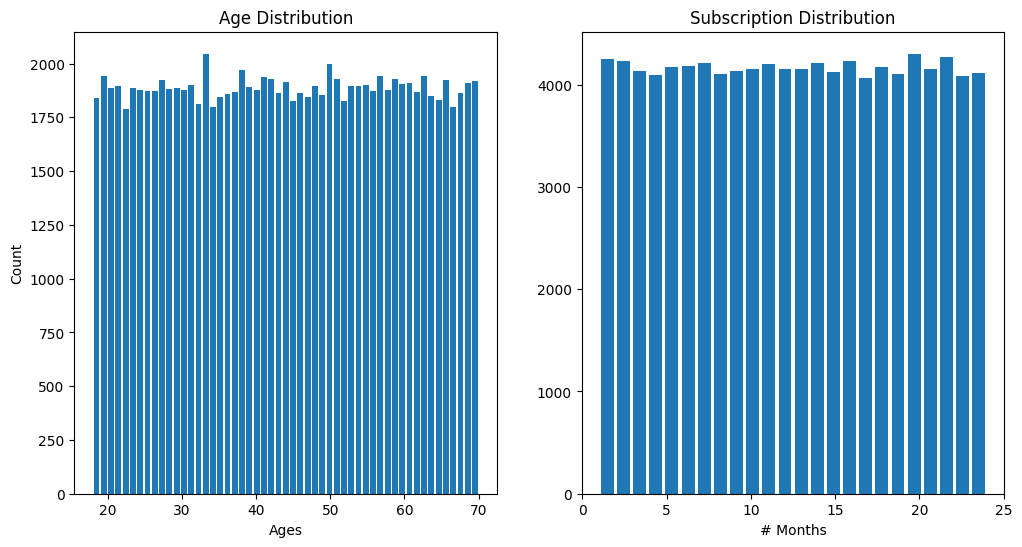

In [142]:
# Creating a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of Age
axs[0].hist(df.Age, bins=(df.Age.max()-df.Age.min())+1, rwidth=0.8)
axs[0].set_title("Age Distribution")

# Histogram of subscription months
axs[1].hist(df.Subscription_Length_Months, bins=(df.Subscription_Length_Months.max()-df.Subscription_Length_Months.min())+1,rwidth=0.8)
axs[1].set_title("Subscription Distribution")

axs[0].set_ylabel('Count')
axs[0].set_xlabel('Ages')
axs[1].set_xlabel('# Months')
plt.show()

## **Age Distribution**
### Age histogram exhibits uniform distribution along with the repeated peaks. Same pattern is followed throughout which rules out any possibility of outliers

## **Subscription Distribution**
### - The even distribution of subscriptions suggests that people are subscribing uniformly across various time intervals.

### - It that there are no particular periods that attract significantly more or fewer subscriptions than others

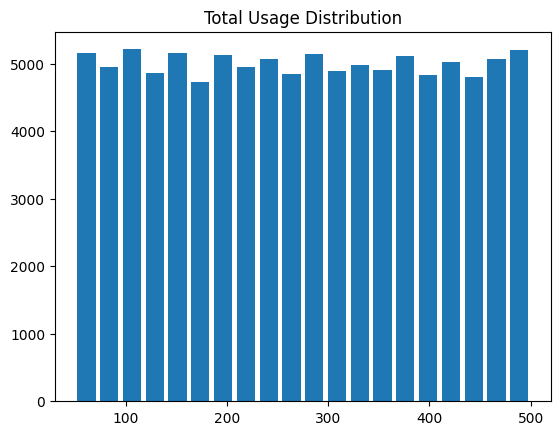

In [143]:
# Histogram of total usage
plt.hist(df.Total_Usage_GB, bins=20, rwidth=0.8)
plt.title("Total Usage Distribution")
plt.show()

### - There is a uniform distribution of usage across various data packages which indicates that each package is utilized by similar proportion of the total population

### - This could imply that there is no strong preference or bias towards any particular package

### - It is safe to say that there are no outliers

# **Outlier Detection using Z-Score**

### Considering threshold value to be 3. If the z-score > 3, this implies existence of outliers

In [144]:
# Age
z_score_age = (df.Age - df.Age.mean())/df.Age.std()
z_score_age

0        1.241664
1        1.176220
2       -1.310645
3       -0.525319
4        0.129119
           ...   
99995   -0.721650
99996    1.176220
99997    1.307108
99998    0.456338
99999   -1.114313
Name: Age, Length: 100000, dtype: float64

In [145]:
df.Age[z_score_age >=3].count()

0

In [146]:
# Monthly Bill
z_score_bill = (df.Monthly_Bill - df.Monthly_Bill.mean())/df.Monthly_Bill.std()
z_score_bill

0        0.410604
1       -0.805370
2        1.009199
3        1.625589
4       -0.341718
           ...   
99995   -0.490502
99996   -0.168219
99997    1.535133
99998   -0.781149
99999    0.569274
Name: Monthly_Bill, Length: 100000, dtype: float64

In [147]:
df.Monthly_Bill[z_score_bill >=3].count()

0

In [148]:
# Total_Usage_GB
# Monthly Bill
z_score_usage = (df.Total_Usage_GB - df.Total_Usage_GB.mean())/df.Total_Usage_GB.std()
z_score_usage

0       -0.294288
1       -0.784848
2        1.422674
3        0.173278
4       -0.064337
           ...   
99995   -0.370938
99996    0.587188
99997   -0.179312
99998    1.223383
99999   -0.777183
Name: Total_Usage_GB, Length: 100000, dtype: float64

In [149]:
df.Total_Usage_GB[z_score_bill >=3].count()

0

### The Z-score test implies that there are no existence of outliers in the features - Age, Monthly Bill and Total Usage

# **Encoding Categorical Data**

In [150]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### There are two categorial features that need to be encoded, namely, Gender and Location

### Extracting unique values from each feature

In [151]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

=> Two unique values:
- Male
- Female

In [152]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

=> Five unique values:
- Los Angeles
- New York
- Miami
- Chicago
- Houston

### Applying Label-Encoding on Gender Feature
#### using sklearn

In [153]:
# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [154]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,0,New York,1,48.76,172,0
2,3,Customer_3,24,0,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,0,Miami,3,97.94,297,1
4,5,Customer_5,46,0,Miami,19,58.14,266,0
5,6,Customer_6,67,1,New York,15,82.65,456,1
6,7,Customer_7,30,0,Chicago,3,73.79,269,0
7,8,Customer_8,67,0,Miami,1,97.70,396,1
8,9,Customer_9,20,0,Miami,10,42.45,150,1
9,10,Customer_10,53,0,Los Angeles,12,64.49,383,1


### Applying One Hot Encoding on  Locations Feature


In [155]:
# Saving column names
dummy_cols = pd.get_dummies(df['Location']).columns
dummy_cols = list(dummy_cols)

cols =  dummy_cols + ['CustomerId','Name','Age','Gender'] + ['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']
cols

['Chicago',
 'Houston',
 'Los Angeles',
 'Miami',
 'New York',
 'CustomerId',
 'Name',
 'Age',
 'Gender',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [156]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[4])], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df))


In [157]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,0.0,0.0,1,Customer_1,63,1,17,73.36,236,0
1,0.0,0.0,0.0,0.0,1.0,2,Customer_2,62,0,1,48.76,172,0
2,0.0,0.0,1.0,0.0,0.0,3,Customer_3,24,0,5,85.47,460,0
3,0.0,0.0,0.0,1.0,0.0,4,Customer_4,36,0,3,97.94,297,1
4,0.0,0.0,0.0,1.0,0.0,5,Customer_5,46,0,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,99996,Customer_99996,33,1,23,55.13,226,1
99996,0.0,0.0,0.0,0.0,1.0,99997,Customer_99997,62,0,19,61.65,351,0
99997,1.0,0.0,0.0,0.0,0.0,99998,Customer_99998,64,1,17,96.11,251,1
99998,0.0,0.0,0.0,0.0,1.0,99999,Customer_99999,51,0,20,49.25,434,1


In [158]:
df.columns = cols
df

,Chicago,Houston,Los Angeles,Miami,New York,CustomerId,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0.0,0.0,1.0,0.0,0.0,1,Customer_1,63,1,17,73.36,236,0
1,0.0,0.0,0.0,0.0,1.0,2,Customer_2,62,0,1,48.76,172,0
2,0.0,0.0,1.0,0.0,0.0,3,Customer_3,24,0,5,85.47,460,0
3,0.0,0.0,0.0,1.0,0.0,4,Customer_4,36,0,3,97.94,297,1
4,0.0,0.0,0.0,1.0,0.0,5,Customer_5,46,0,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,99996,Customer_99996,33,1,23,55.13,226,1
99996,0.0,0.0,0.0,0.0,1.0,99997,Customer_99997,62,0,19,61.65,351,0
99997,1.0,0.0,0.0,0.0,0.0,99998,Customer_99998,64,1,17,96.11,251,1
99998,0.0,0.0,0.0,0.0,1.0,99999,Customer_99999,51,0,20,49.25,434,1


# Train Test Splitting

In [161]:
X = df.iloc[:,:-1]
X

,Chicago,Houston,Los Angeles,Miami,New York,CustomerId,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.0,0.0,1.0,0.0,0.0,1,Customer_1,63,1,17,73.36,236
1,0.0,0.0,0.0,0.0,1.0,2,Customer_2,62,0,1,48.76,172
2,0.0,0.0,1.0,0.0,0.0,3,Customer_3,24,0,5,85.47,460
3,0.0,0.0,0.0,1.0,0.0,4,Customer_4,36,0,3,97.94,297
4,0.0,0.0,0.0,1.0,0.0,5,Customer_5,46,0,19,58.14,266
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,99996,Customer_99996,33,1,23,55.13,226
99996,0.0,0.0,0.0,0.0,1.0,99997,Customer_99997,62,0,19,61.65,351
99997,1.0,0.0,0.0,0.0,0.0,99998,Customer_99998,64,1,17,96.11,251
99998,0.0,0.0,0.0,0.0,1.0,99999,Customer_99999,51,0,20,49.25,434


In [162]:
y = df.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: object

In [163]:
# splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)